<a href="https://colab.research.google.com/github/Tuhin805Das/Face_Mask_Detection/blob/main/Project_Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 19.8MB/s]
100% 163M/163M [00:08<00:00, 19.4MB/s]


In [ ]:
import zipfile
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The database is extracted')

The database is extracted


In [ ]:
!ls

 data			 sample_data	       'Without mask.jpeg'
 face-mask-dataset.zip	'with mask.jpeg'
 kaggle.json		'without mask 2.jpeg'


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
# create a list with all the file names of with_mask (os.listdir --> list directory)
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1377.jpg', 'with_mask_3491.jpg', 'with_mask_163.jpg', 'with_mask_2264.jpg', 'with_mask_1697.jpg']
['with_mask_2519.jpg', 'with_mask_3193.jpg', 'with_mask_2245.jpg', 'with_mask_2915.jpg', 'with_mask_1153.jpg']


In [ ]:
# without_mask
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3207.jpg', 'without_mask_2745.jpg', 'without_mask_1825.jpg', 'without_mask_1108.jpg', 'without_mask_1999.jpg']
['without_mask_2826.jpg', 'without_mask_3446.jpg', 'without_mask_2555.jpg', 'without_mask_2571.jpg', 'without_mask_3218.jpg']


In [ ]:
print('Number of with mask images : ' , len(with_mask_files))
print('Number of without mask images : ' , len(without_mask_files))

Number of with mask images :  3725
Number of without mask images :  3828


**Creating Labels for two class of images**

with mask --> 1   
without mask --> 0

In [ ]:
#create the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

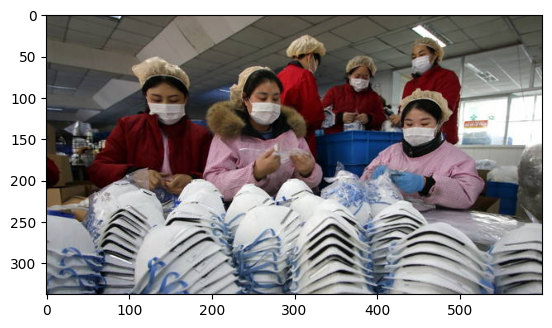

In [ ]:
# Displaying with mask image ...... (.imread --> read image as numpy array)
img = mpimg.imread('/content/data/with_mask/with_mask_3534.jpg')
imgplot = plt.imshow(img)
plt.show()

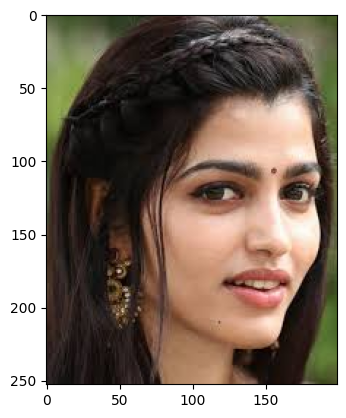

In [ ]:
# Displaying without mask image ...... (.imread --> read image as numpy array)
img = mpimg.imread('/content/data/without_mask/without_mask_1651.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**

1. Resize the images
2. Convert the images to numpy arrays

In [ ]:
# convert the images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files :
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files :
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[49, 29, 22],
        [46, 27, 18],
        [49, 25, 18],
        ...,
        [53, 32, 24],
        [54, 31, 25],
        [52, 29, 23]],

       [[49, 26, 20],
        [51, 28, 19],
        [53, 30, 20],
        ...,
        [53, 32, 24],
        [54, 31, 25],
        [53, 30, 24]],

       [[53, 28, 21],
        [57, 32, 22],
        [61, 35, 26],
        ...,
        [54, 33, 25],
        [55, 32, 26],
        [54, 31, 25]],

       ...,

       [[58, 38, 26],
        [60, 40, 30],
        [52, 34, 24],
        ...,
        [ 6,  4,  7],
        [ 5,  5,  7],
        [ 6,  6,  8]],

       [[55, 35, 24],
        [59, 39, 28],
        [51, 33, 22],
        ...,
        [ 6,  4,  7],
        [ 5,  5,  7],
        [ 6,  6,  8]],

       [[57, 34, 26],
        [59, 39, 30],
        [52, 33, 24],
        ...,
        [ 6,  4,  7],
        [ 5,  5,  7],
        [ 6,  6,  8]]], dtype=uint8)

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
print(X[0])

[[[49 29 22]
  [46 27 18]
  [49 25 18]
  ...
  [53 32 24]
  [54 31 25]
  [52 29 23]]

 [[49 26 20]
  [51 28 19]
  [53 30 20]
  ...
  [53 32 24]
  [54 31 25]
  [53 30 24]]

 [[53 28 21]
  [57 32 22]
  [61 35 26]
  ...
  [54 33 25]
  [55 32 26]
  [54 31 25]]

 ...

 [[58 38 26]
  [60 40 30]
  [52 34 24]
  ...
  [ 6  4  7]
  [ 5  5  7]
  [ 6  6  8]]

 [[55 35 24]
  [59 39 28]
  [51 33 22]
  ...
  [ 6  4  7]
  [ 5  5  7]
  [ 6  6  8]]

 [[57 34 26]
  [59 39 30]
  [52 33 24]
  ...
  [ 6  4  7]
  [ 5  5  7]
  [ 6  6  8]]]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 )

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[1]

array([[[108, 107, 102],
        [ 80,  79,  75],
        [ 49,  49,  47],
        ...,
        [ 35,  34,  39],
        [ 34,  33,  38],
        [ 33,  32,  37]],

       [[ 94,  93,  89],
        [ 68,  68,  64],
        [ 42,  42,  40],
        ...,
        [ 34,  33,  38],
        [ 34,  33,  38],
        [ 33,  32,  37]],

       [[ 84,  83,  78],
        [ 59,  58,  53],
        [ 36,  35,  31],
        ...,
        [ 35,  34,  39],
        [ 34,  33,  38],
        [ 34,  33,  38]],

       ...,

       [[226, 220, 204],
        [225, 219, 203],
        [224, 218, 202],
        ...,
        [240, 237, 230],
        [241, 238, 231],
        [241, 238, 231]],

       [[227, 221, 205],
        [227, 221, 205],
        [226, 220, 204],
        ...,
        [240, 237, 230],
        [242, 239, 232],
        [242, 239, 232]],

       [[229, 223, 207],
        [228, 222, 206],
        [227, 221, 205],
        ...,
        [240, 237, 228],
        [241, 238, 229],
        [241, 238, 229]]

In [ ]:
X_train_scaled[1]

array([[[0.42352941, 0.41960784, 0.4       ],
        [0.31372549, 0.30980392, 0.29411765],
        [0.19215686, 0.19215686, 0.18431373],
        ...,
        [0.1372549 , 0.13333333, 0.15294118],
        [0.13333333, 0.12941176, 0.14901961],
        [0.12941176, 0.1254902 , 0.14509804]],

       [[0.36862745, 0.36470588, 0.34901961],
        [0.26666667, 0.26666667, 0.25098039],
        [0.16470588, 0.16470588, 0.15686275],
        ...,
        [0.13333333, 0.12941176, 0.14901961],
        [0.13333333, 0.12941176, 0.14901961],
        [0.12941176, 0.1254902 , 0.14509804]],

       [[0.32941176, 0.3254902 , 0.30588235],
        [0.23137255, 0.22745098, 0.20784314],
        [0.14117647, 0.1372549 , 0.12156863],
        ...,
        [0.1372549 , 0.13333333, 0.15294118],
        [0.13333333, 0.12941176, 0.14901961],
        [0.13333333, 0.12941176, 0.14901961]],

       ...,

       [[0.88627451, 0.8627451 , 0.8       ],
        [0.88235294, 0.85882353, 0.79607843],
        [0.87843137, 0

**Building a convolutional Neural Network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu' , input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train , validation_split=0.1 , epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4544 - acc: 0.7953 - val_loss: 0.2965 - val_acc: 0.8727
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2866 - acc: 0.8860 - val_loss: 0.2392 - val_acc: 0.8992
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2442 - acc: 0.9016 - val_loss: 0.2212 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1975 - acc: 0.9259 - val_loss: 0.2454 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1740 - acc: 0.9312 - val_loss: 0.2237 - val_acc: 0.9140


**Model Evaluation**

In [ ]:
# model.evaluate --> returns tow values loss and accuracy

loss , accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2071 - acc: 0.9133
Test Accuracy =  0.9133024215698242


In [ ]:
history.history['loss']

[0.45437687635421753,
 0.28655627369880676,
 0.2441622018814087,
 0.19748955965042114,
 0.1739649921655655]

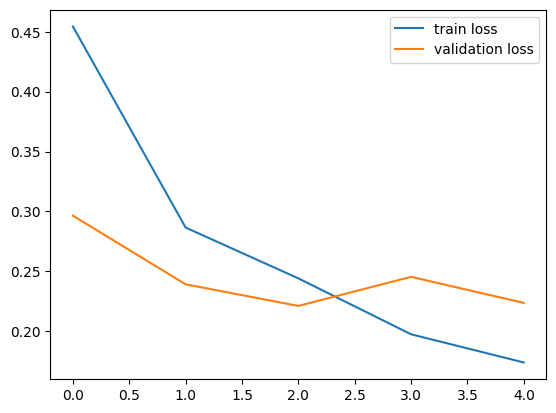

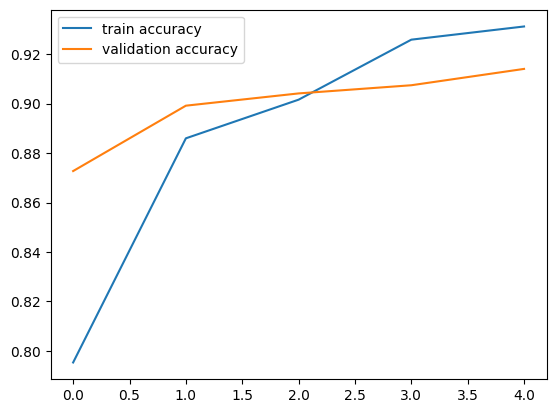

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted : /content/Without mask.jpeg


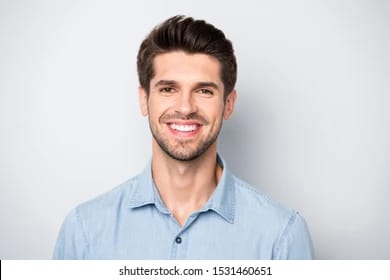

1/1 [==============================] - 0s 19ms/step
[[0.50388664 0.44667214]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted : ')

input_image = cv2.imread(input_image_path) # read image as numpy array

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image , (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled , [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')


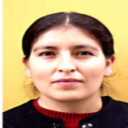

In [ ]:
img= '/content/data/without_mask/without_mask_1199.jpg'
img1 = cv2.imread(img)
img2=cv2.resize(img1,(128,128))
cv2_imshow(img2)